# Week4授業前課題1 アヤメの分類

In [1]:
# 最初に使用予定のデータやライブラリーを宣言しておく
from sklearn.datasets import load_iris # アイリスデータ
from sklearn.model_selection import train_test_split # データ分割
from sklearn.preprocessing import StandardScaler # 標準化
from sklearn.neighbors import KNeighborsClassifier # 最近傍法
from sklearn.metrics import accuracy_score # 正解率
from sklearn.metrics import precision_score # 適合率
from sklearn.metrics import recall_score # 再現率
from sklearn.metrics import f1_score # F値
from sklearn.metrics import confusion_matrix # 混合行列
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.svm import SVC #SVC 
from sklearn.model_selection import cross_val_score # 決定木
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.datasets import make_classification # ランダムフォレスト

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # グラフ描写のライブラリー
import matplotlib.patches as mpatches # 【問題7】可視化
import seaborn as sns # グラフ描写のライブラリー

### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。
irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica
sepal_lengthとpetal_length
＜実際の問題では？＞

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。
そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。
また、Week3で利用した散布図行列を使い可視化することも可能です。

In [2]:
"""
アイリスデータを取得。取得方法はweek3と同じ。
データフレームで抽出
virgicolorとvirginica
sepal_lengthとpetal_length
"""
iris = load_iris()

# df = pd.DataFrame(np.array(iris.data))
# df

# print(iris.data.shape)
# print(type(iris))

# iris.feature_names
# iris.target

# iris.target_names
# iris.feature_names
# 冨永最初考えていたやつ
# df1 = pd.DataFrame(np.array(iris.target),columns=['Species']) #データフレームのデータを良く見て判断した
# df1[df1['Species'].isin([1,2])] # データ値がわかっているのでisinを使った
# df1

df1 = pd.DataFrame(iris.data, columns=iris.feature_names) 
df1["species"] = iris.target
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
"""
アイリスデータを取得。取得方法はweek3と同じ。
データフレームで抽出
sepal_lengthとpetal_length
上記のデータとは違い、データの値は定数じゃないので
列で抽出する事にした。列の抽出は.loc を使うんだ！！
"""
# http://ailaby.com/lox_iloc_ix/#id1
# 列ラベルを指定
# 
# df.loc[:, ['col_1','col_2']]

# 冨永最初考えていたやつ
# df2 = pd.DataFrame(np.array(iris.data),columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
# df2.loc[:, ['sepal length (cm)','petal length (cm)']]

df2 = df1.loc[:,['sepal length (cm)','petal length (cm)', 'species']]
df2 = df2[df2["species"].isin(["1","2"])]
df2.head()

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。
その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。
sepal_lengthとpetal_lengthを使い、
virgicolorとvirginicaを分類するのは
少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、
抜き出したデータの散布図と箱ひげ図（boxplot）、
バイオリン図（violinplot）を表示してください。

＜実際の問題では？＞

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。
今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。
前処理
データに加工をしていきます。

In [4]:
"""
# 冨永最初考えていたやつ
# sns.pairplot(df1, hue='Species')
pg = sns.pairplot(df2, hue='sepal length (cm)')
# sns.pairplot(df2, hue='petal length (cm)')
print(type(pg))
"""
iris_virgicolor = df2[df2["species"] == 1]
iris_virginica = df2[df2["species"] == 2]

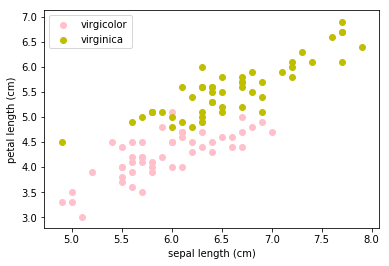

In [5]:
plt.scatter(iris_virgicolor["sepal length (cm)"],iris_virgicolor["petal length (cm)"],c="pink",label="virgicolor")
plt.scatter(iris_virginica["sepal length (cm)"],iris_virginica["petal length (cm)"],c="y",label="virginica")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend()
plt.show()

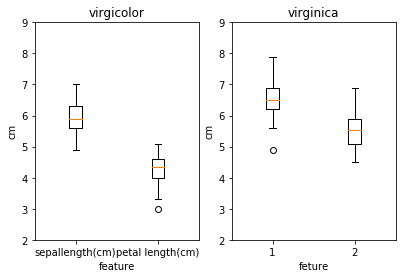

In [6]:
"""
抜き出したデータを元に下記を作成
・散布図
・箱ひげ図
・バイオリン図
# 散布図行列を出して見る

# 箱ひげ図
pg2 = df2.plot( kind='box')
print(type(pg2))
"""

plt.subplots(figsize=(10,4))

# plt.subplot(1,3,1) # これってどうゆう事？？表の出力させる位置を指定出来る!!!
# plt.boxplot([iris_virgicolor["sepal length (cm)"],iris_virgicolor["petal length (cm)"]]) # a二つのデーたを使用している

plt.subplot(1,3,2) # これってどうゆう事？？表の出力させる位置を指定出来る!!!
plt.boxplot([iris_virgicolor["sepal length (cm)"],iris_virgicolor["petal length (cm)"]]) # a二つのデーたを使用している
plt.xticks([1,2],["sepallength(cm)","petal length(cm)"]) # データ名を指定している
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virgicolor")
plt.ylim(2,9)

plt.subplot(1,3,3)
plt.boxplot([iris_virginica["sepal length (cm)"],iris_virginica["petal length (cm)"]])
plt.xlabel("feture")
plt.ylabel("cm")
plt.title("virginica")
plt.ylim(2,9)

plt.show()

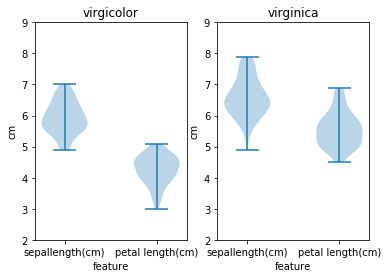

In [7]:
"""
# 冨永がはじめに考えたやつ。。なんでか出力されない。。
# バイオリン図
# グラフの見た目を良くする
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('pink')

# データフレームを投入する時は.meltが使いやすいらしい
df_melt = pd.melt(df2)
print(df_melt.head())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.violinplot(x='variable', y='value', data=df_melt, jitter=True, color='pink', ax=ax)

ax.set_xlabel('iris_columns')
ax.set_ylabel('value')
ax.set_ylim(-1, 9)
plt.show()
"""

plt.subplot(1,2,1) 
plt.violinplot([iris_virgicolor["sepal length (cm)"],iris_virgicolor["petal length (cm)"]]) # バイオリン図にしているだけ
plt.xticks([1,2],["sepallength(cm)","petal length(cm)"]) # データ名を指定している
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virgicolor")
plt.ylim(2,9)

plt.subplot(1,2,2) 
plt.violinplot([iris_virginica["sepal length (cm)"],iris_virginica["petal length (cm)"]]) # バイオリン図にしているだけ
plt.xticks([1,2],["sepallength(cm)","petal length(cm)"]) # データ名を指定している
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virginica")
plt.ylim(2,9)


plt.show()

### 【問題3】前処理・訓練用データと検証用データの分割
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。
今回は訓練用データ75%、検証用データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。
公式ドキュメントのExamplesを参考に動かしてください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

＜注意点＞
データの分析まではPandasのDataFrameを使用してきました。
しかし、scikit-learnはNumPyのndarrayを想定して作られています。
そのため、この段階でndarrayへの変換を行いましょう。
特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

＜分割する理由＞
分類問題の目的は未知のデータを正しく分類することです。
その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。
この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。
学習に使うデータを訓練用データ、検証に使うデータが検証用データで、一般的に7対3から8対2程度の割合にします。

In [8]:
"""
とりあえずデータを分割したい。訓練用と検証用の二つ。
で、それぞれの割合を75%,25%で分割する。
分割する時にdataframeは使えないのでnumpyで進める。
Xには特徴量、yには目的変数をそれぞれ numpy で作成する
"""
# df2.head()
# iris データ(df2)から特徴量だけに変換して numpy に変換(values)している。
X = df2.drop(columns = "species").values


In [9]:
# iris データ(df2)の目的変数だけ
y = df2["species"].values

In [10]:
# データ分割メソッドを使用する
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.25, random_state=42)
y_test

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2])

### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

＜注意点＞
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

＜実際の問題での前処理は？＞
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [11]:
"""
標準化のやり方は、
訓練用データでfit をする。
訓練用データと検証用データをfitする。

"""
scaler = StandardScaler() # 標準化用のライブラリーをインスタンス化
# fitする,
# print("1")
# print(X_train)
# scaler.fit(X_train) # 訓練用データで fit をする。(スカラーデータに変更？)別の変数に格納しない。
X_train_fit = scaler.fit(X_train) # 訓練用データで fit をする。(スカラーデータに変更？)別の変数に格納しない。
X_test_fit = scaler.fit(X_train) # 訓練用データで fit をする。(スカラーデータに変更？)別の変数に格納しない。
# print("2")
# print(X_train_fit)

# transformする。対象は訓練用データと検証用データ
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)


### 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [12]:
# 解答例
# 最近某方のインスタンスを作成する。
neigh_5 = KNeighborsClassifier(n_neighbors=5)
# 【学習】作成したインスタンスで訓練用データを引数にして学習をさせる。
neigh_5.fit(X_train_transform, y_train) 
# 【推定】作成したインスタンスにpredict メソッドを使用して推定する。
y_pred_5nn = neigh_5.predict(X_test_transform)
# 推定結果を（y_pred_3nn）
print(y_pred_5nn)

neigh_3 = KNeighborsClassifier(n_neighbors=3) 
neigh_3.fit(X_train, y_train) 
y_pred_3nn = neigh_3.predict(X_test)
print(y_pred_3nn)

neigh_1 = KNeighborsClassifier(n_neighbors=1) 
neigh_1.fit(X_train, y_train) 
y_pred_1nn = neigh_1.predict(X_test)
print(y_pred_1nn)

# 実際の判別表(模範解答)
print(y_test)


[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 2]


In [13]:
# 冨永独自作成
# https://qiita.com/fujin/items/128ed7188f7e7df74f2c
knn_5 = KNeighborsClassifier(n_neighbors=5) # 学習したモデルのインスタンス。model ： object 可視化の時に使用する
print(knn_5)
# neigh_fit = neigh.fit(X_train, y_train) 
# neigh_fit_pre = neigh_fit.predict
# print(neigh_fit_pre)
knn_5_fit = knn_5.fit(X_tr_sc,y_train)
y_pred_knn5 = knn_5_fit.predict(X_te_sc)
print(y_pred_knn5)
score = knn_5.score(X_test,y_test)
print(score)

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1_fit = knn_1.fit(X_tr_sc,y_train)
y_pred_knn1 = knn_1_fit.predict(X_te_sc)
print(y_pred_knn1)
score = knn_1.score(X_test,y_test)
print(score)

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3_fit = knn_3.fit(X_tr_sc,y_train)
y_pred_knn3 = knn_3_fit.predict(X_te_sc)
print(y_pred_knn3)
score = knn_3.score(X_test,y_test)
print(score)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


NameError: name 'X_tr_sc' is not defined

### 【問題6】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

In [ ]:
"""
scikit-learnを使い4種類の指標を計算する
"""
# 正解率
acc_knn5 = accuracy_score(y_test, y_pred_knn5)
print(acc_knn5)
print(accuracy_score(y_test, y_pred_knn5, normalize=False))

In [ ]:
# 適合率
precision_knn5 = precision_score(y_test, y_pred_knn5)
print(precision_score(y_test, y_pred_knn5, average='macro'))
print(precision_score(y_test, y_pred_knn5, average='micro'))
print(precision_score(y_test, y_pred_knn5, average='weighted'))
# precision_score(y_test, y_pred_knn5, average='None')

In [ ]:
# 再現率
recall_knn5 = recall_score(y_test, y_pred_knn5)
print(recall_score(y_test, y_pred_knn5, average='macro'))
print(recall_score(y_test, y_pred_knn5, average='micro'))
print(recall_score(y_test, y_pred_knn5, average='weighted'))
# recall_score(y_true, y_pred, average=None)


In [ ]:
# F値
f1_knn5 = f1_score(y_test, y_pred_knn5)
print(f1_score(y_test, y_pred_knn5, average='macro'))
print(f1_score(y_test, y_pred_knn5, average='micro'))
print(f1_score(y_test, y_pred_knn5, average='weighted'))
# f1_score(y_true, y_pred, average=None)


In [ ]:
"""
混同行列をscikit-learnを使い表示する
"""
# 混合行列
confusion_matrix(y_test, y_pred_knn5)

In [ ]:
"""
4種類の指標値の意味について簡単に調査して文章でまとめる
"""

https://data.gunosy.io/entry/2016/08/05/115345
#### 正解率 (Accuracy)
この指標自体を精度という場合もあります*3。 予測結果全体と、答えがどれぐらい一致しているかを判断する指標。計算式は下記を参照。
一見優れた指標に見えますが、発表スライドにもある通り、正解データの正が1%で負が99%のような場合、すべてのデータを不正解と予測するデータがある場合、99%の精度 を持つモデルと評価されてしまいます。これではよいモデルとは言えないので下記の指標を併せて使う場合が多いです。

#### 適合率 (Precision)
偽陽性を低く抑えることを目的とする場合には適合率が高いモデルを採用します。犯罪の検挙を例にすると、一般市民を冤罪で逮捕してしまう率を低く抑えることができます。しかし、逆に真犯人を見つける確率も下がる場合もあります。

#### 再現率 (Recall)
偽陰性を低く抑えたい場合に採用する指標です。

#### F値 (F-measure, F-score)
適合率と再現率はトレードオフの関係にある(どちらかが高くなるとどちらかが低くなる)ので調和平均をとった指標です。

### 【問題7】可視化
評価の一貫として可視化を行います。
今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。
以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。
Xとyには訓練用データまたは検証用データを与えます。

In [ ]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [ ]:
decision_region(X_tr_sc, y_train, knn_5)

In [ ]:
decision_region(X_tr_sc, y_train, knn_1)

In [ ]:
decision_region(X_tr_sc, y_train, knn_3)

### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。
そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。
どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。
  
最近傍法  
ロジスティック回帰  
SVM  
決定木  
ランダムフォレスト  
公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。  
＜実際の問題では？＞  
ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。  

In [ ]:
# 最近傍法 # 問題５で実施済み

In [ ]:
# ロジクスティック回帰
# logistic regression model 
logreg = LogisticRegression()
logreg = logreg.fit(X_tr_sc, y_train)

y_pred_logreg = logreg.predict(X_te_sc)

cnf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

In [ ]:
# SVM
svmcf = SVC()
svmcf = svmcf.fit(X_tr_sc, y_train)

y_pred_svmcf = svmcf.predict(X_te_sc)

cnf_matrix_svmcf = confusion_matrix(y_test, y_pred_svmcf)
accuracy_svmcf = accuracy_score(y_test, y_pred_svmcf)
precision_svmcf = precision_score(y_test, y_pred_svmcf)
recall_svmcf = recall_score(y_test, y_pred_svmcf)
f1_svmcf = f1_score(y_test, y_pred_svmcf)

In [ ]:
# 決定木 #Decision Tree
dtcf = DecisionTreeClassifier()
dtcf = dtcf.fit(X_tr_sc, y_train)

y_pred_dtcf = dtcf.predict(X_te_sc)

cnf_matrix_dtcf = confusion_matrix(y_test, y_pred_dtcf)
accuracy_dtcf = accuracy_score(y_test, y_pred_dtcf)
precision_dtcf  = precision_score(y_test, y_pred_dtcf)
recall_dtcf = recall_score(y_test, y_pred_dtcf)
f1_dtcf  = f1_score(y_test, y_pred_dtcf)

In [ ]:
# ランダムフォレスト #Random Forest
RF = RandomForestClassifier()
RF = RF.fit(X_tr_sc, y_train)

y_pred_RF = dtcf.predict(X_te_sc)

cnf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF  = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)

In [ ]:
result_df = pd.DataFrame({"accuracy":[acc_knn5,accuracy_logreg,accuracy_svmcf,accuracy_dtcf,accuracy_RF],
                         "precision":[precision_knn5,precision_logreg,precision_svmcf ,precision_dtcf,precision_RF],
                         "recall":[recall_knn5,recall_logreg,recall_svmcf, recall_dtcf, recall_RF],
                         "f1 score":[f1_knn5,f1_logreg, f1_svmcf, f1_dtcf, f1_RF]},
                        index=["k-means", "LogisticRegression", "SVM", "DecisionTree", "RandomForest"])
result_df

In [ ]:
decision_region(X_tr_sc, y_train, knn_5) # 最近ボウホウ

decision_region(X_tr_sc, y_train, logreg) # ロジスティック回帰

decision_region(X_tr_sc, y_train, svmcf) # SVM

decision_region(X_tr_sc, y_train, dtcf) # 決定木

decision_region(X_tr_sc, y_train, RF) # ランダムフォレスト

### ●考察
表から判断すると、正解率だけ見るとロジスティック回帰、再現性、f値が高い。  
グラフからはSVMは楕円形の範囲をカバーしている。他の指標の決定域を見ると直線的な範囲をしている。  
グラフだけで検討するとSVM、数値表で判断するとロジスティック回帰。